In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df_instagram = pd.read_csv('data/social_media_influencers_instagram.csv')

# 1) Understanding Data

In [3]:
print(df_instagram.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB
None


In [4]:
print(df_instagram.columns)

Index(['Influencer insta name', 'instagram name', 'category_1', 'category_2',
       'Followers', 'Audience country(mostly)', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')


In [5]:
df_instagram.rename(columns={'Influencer insta name':'influencer_insta_name', 
                             'instagram name':'insta_name',
                             'Followers':'followers', 
                             'Audience country(mostly)': 'majority_country',
                             'Authentic engagement\r\n':'authentic_engagement', 
                             'Engagement avg\r\n':'average_engagement'}, inplace=True)

In [6]:
print(df_instagram.columns)

Index(['influencer_insta_name', 'insta_name', 'category_1', 'category_2',
       'followers', 'majority_country', 'authentic_engagement',
       'average_engagement'],
      dtype='object')


In [7]:
df_instagram.describe()

,influencer_insta_name,insta_name,category_1,category_2,followers,majority_country,authentic_engagement,average_engagement
count,1000,979,892,287,1000,986,1000,1000
unique,997,975,31,27,411,32,850,778
top,angelinajolie,Bruno Goes 🎭,Music,Cinema & Actors/actresses,6M,United States,1.1M,1.1M
freq,2,2,235,59,11,279,22,28


In [8]:
df_instagram.head()

,influencer_insta_name,insta_name,category_1,category_2,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [9]:
df_instagram.groupby('category_1').count()

,influencer_insta_name,insta_name,category_2,followers,majority_country,authentic_engagement,average_engagement
category_1,,,,,,,
Accessories & Jewellery,1,1,1,1,1,1,1
Adult content,6,6,0,6,6,6,6
Animals,1,1,0,1,1,1,1
Art/Artists,12,12,9,12,12,12,12
Beauty,28,27,12,28,28,28,28
Business & Careers,4,4,0,4,4,4,4
Cars & Motorbikes,5,5,3,5,5,5,5
Cinema & Actors/actresses,214,210,51,214,214,214,214
Clothing & Outfits,5,5,4,5,5,5,5


In [10]:
df_instagram['category_1'].value_counts()

Music                        235
Cinema & Actors/actresses    214
Sports with a ball           113
Lifestyle                     99
Shows                         43
Modeling                      36
Beauty                        28
Humor & Fun & Happiness       18
Art/Artists                   12
Family                        11
Fitness & Gym                 10
Fashion                        9
Computers & Gadgets            9
Racing Sports                  7
Adult content                  6
Cars & Motorbikes              5
Finance & Economics            5
Clothing & Outfits             5
Photography                    4
Business & Careers             4
Food & Cooking                 3
Literature & Journalism        3
Nature & landscapes            3
Management & Marketing         2
Science                        2
Animals                        1
Accessories & Jewellery        1
Education                      1
Luxury                         1
Machinery & Technologies       1
Kids & Toy

In [11]:
df_instagram_category1 = df_instagram['category_1'].value_counts().rename_axis('unique_categories').reset_index(name='category_counts')
df_instagram_category1

,unique_categories,category_counts
0,Music,235
1,Cinema & Actors/actresses,214
2,Sports with a ball,113
3,Lifestyle,99
4,Shows,43
5,Modeling,36
6,Beauty,28
7,Humor & Fun & Happiness,18
8,Art/Artists,12
9,Family,11


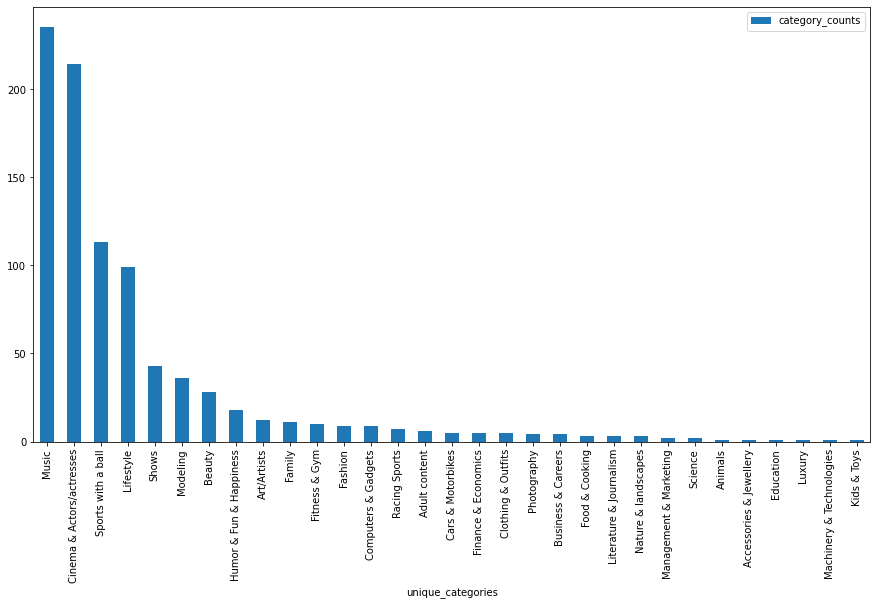

In [12]:
df_instagram_category1.plot.bar(x='unique_categories', y='category_counts', rot=90, figsize=(15,8))

In [13]:
df_instagram['category_1'].describe()

count       892
unique       31
top       Music
freq        235
Name: category_1, dtype: object

In [14]:
df_instagram.groupby('category_2').count()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
category_2,,,,,,,
Adult content,1,1,1,1,1,1,1
Art/Artists,17,17,17,17,17,17,17
Beauty,12,11,12,12,12,12,12
Business & Careers,6,6,6,6,6,6,6
Cars & Motorbikes,1,1,1,1,1,1,1
Cinema & Actors/actresses,59,59,59,59,59,59,59
Clothing & Outfits,5,5,5,5,5,5,5
Comics & sketches,2,2,2,2,2,2,2
Computers & Gadgets,1,1,1,1,0,1,1


In [15]:
df_instagram['category_2'].value_counts()

Cinema & Actors/actresses    59
Lifestyle                    55
Modeling                     30
Fashion                      18
Art/Artists                  17
Shows                        16
Music                        15
Beauty                       12
Family                       10
Humor & Fun & Happiness      10
Sports with a ball            6
Photography                   6
Business & Careers            6
Clothing & Outfits            5
Machinery & Technologies      5
Luxury                        3
Shopping & Retail             2
Comics & sketches             2
Fitness & Gym                 2
Literature & Journalism       1
Trainers & Coaches            1
Finance & Economics           1
Cars & Motorbikes             1
Adult content                 1
Science                       1
Kids & Toys                   1
Computers & Gadgets           1
Name: category_2, dtype: int64

In [16]:
df_instagram_category2 = df_instagram['category_2'].value_counts().rename_axis('unique_categories').reset_index(name='category_counts')
df_instagram_category2

,unique_categories,category_counts
0,Cinema & Actors/actresses,59
1,Lifestyle,55
2,Modeling,30
3,Fashion,18
4,Art/Artists,17
5,Shows,16
6,Music,15
7,Beauty,12
8,Family,10
9,Humor & Fun & Happiness,10


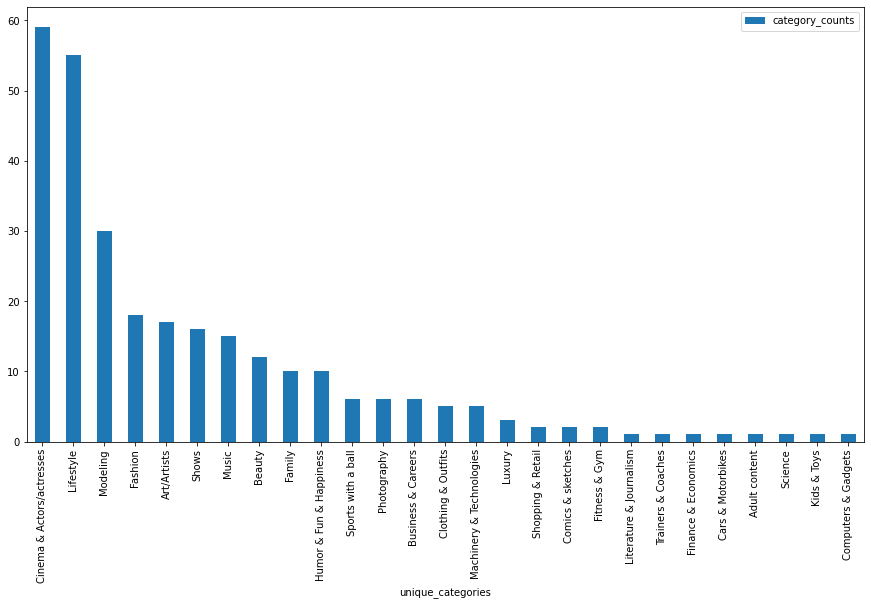

In [17]:
df_instagram_category2.plot.bar(x='unique_categories', y='category_counts', rot=90, figsize=(15,8))

In [18]:
df_instagram['category_2'].describe()

count                           287
unique                           27
top       Cinema & Actors/actresses
freq                             59
Name: category_2, dtype: object

In [19]:
df_instagram[df_instagram['category_1'].notna()].count()

influencer_insta_name    892
insta_name               875
category_1               892
category_2               287
followers                892
majority_country         889
authentic_engagement     892
average_engagement       892
dtype: int64

In [20]:
df_instagram[df_instagram['category_2'].notna()].count()

influencer_insta_name    287
insta_name               284
category_1               287
category_2               287
followers                287
majority_country         285
authentic_engagement     287
average_engagement       287
dtype: int64

# 2) Handling Missing Data

In [21]:
# First, we check whether there is any row that has a not NaN value in 'category_2' column and a NaN value
# in 'category_1' column.
# There is no such row.

df_instagram[df_instagram.category_1.isnull() & df_instagram.category_2.notnull()]

,influencer_insta_name,insta_name,category_1,category_2,followers,majority_country,authentic_engagement,average_engagement


In [22]:
# We remove category_2 column since it can not help us to identify anything specific about the rows. Only 287 rows 
# have non-NaN values out of 1000 rows.

df_instagram_imputed = df_instagram.drop('category_2', axis=1)

In [23]:
df_instagram_imputed.insta_name.duplicated().value_counts()

False    976
True      24
Name: insta_name, dtype: int64

In [24]:
df_instagram_imputed[df_instagram_imputed.insta_name.duplicated()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
23,addisonraee,NaN,Beauty,40.5M,United States,1.1M,1.6M
26,adinross,NaN,NaN,2.6M,United States,551.1K,1.1M
34,alexademie,NaN,NaN,10.8M,United States,1.2M,2.1M
51,amandamanopo,NaN,Modeling,15.2M,Indonesia,189.6K,250.5K
64,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.1K
110,badbunnypr,NaN,Music,38.5M,United States,2.5M,3.9M
250,dominicfike,NaN,NaN,3.7M,United States,419.9K,799K
275,emilia_clarke,NaN,Cinema & Actors/actresses,27M,India,490.5K,617.2K
319,ggonekim,NaN,NaN,5.1M,Indonesia,441.6K,542.6K
345,harrystyles,NaN,Music,43.3M,Brazil,2.9M,3.9M


In [25]:
df_instagram_imputed.influencer_insta_name.duplicated().value_counts()

False    997
True       3
Name: influencer_insta_name, dtype: int64

In [26]:
df_instagram_imputed.insta_name.notna().sum()

979

In [27]:
# The difference between not NaN and number of duplicated values of the the columns 'insta_name' tells us there are
# a few influencers whose rows are duplicated.

df_instagram_imputed.insta_name.unique().size

976

In [28]:
# The following shows, there are three influencers who have one duplicated row.
# In the following lines, we look into the data to decide which row we need to remove.

df_instagram_imputed[df_instagram_imputed.influencer_insta_name.duplicated()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
64,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.1K
459,justinbieber,Justin Bieber,Music,227.4M,India,314.2K,445.3K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.1K


In [29]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'nobru']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
692,nobru,Bruno Goes 🎭,NaN,13.2M,NaN,0,350.2K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.1K


In [30]:
# We also impute the NaN value in 'category_1' column based on the other row not missing this value.

source_index = df_instagram_imputed[(df_instagram_imputed['influencer_insta_name'] == 'nobru') & 
                                    (df_instagram_imputed['category_1'].notnull())].index

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'nobru') & 
                                        (df_instagram_imputed['category_1'].isnull())].index

df_instagram_imputed.loc[target_index, 'category_1'] = df_instagram_imputed.iloc[source_index]['category_1'].tolist()[0]

In [31]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'nobru']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
692,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.2K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.1K


In [32]:
# We keep the row with higher 'average_engagement' value, and we drop the other row.

df_instagram_imputed.drop(index=source_index, axis=0, inplace=True)

df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'nobru']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
692,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.2K


In [33]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'justinbieber']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
458,justinbieber,Justin Bieber,Music,227M,India,439.1K,638.2K
459,justinbieber,Justin Bieber,Music,227.4M,India,314.2K,445.3K


In [34]:
# We keep the row with higher 'average_engagement' value and we drop the other row.

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'justinbieber') & 
                                        (df_instagram_imputed['average_engagement'] == '445.3K')].index

df_instagram_imputed.drop(index=target_index, axis=0, inplace=True)

df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'justinbieber']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
458,justinbieber,Justin Bieber,Music,227M,India,439.1K,638.2K


In [35]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'angelinajolie']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
63,angelinajolie,Angelina Jolie,NaN,12.6M,Brazil,274.6K,456.2K
64,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.1K


In [36]:
# We also impute the NaN value in 'category_1' column based on the other row not missing this value.

source_index = df_instagram_imputed[(df_instagram_imputed['influencer_insta_name'] == 'angelinajolie') & 
                                    (df_instagram_imputed['category_1'].notnull())].index

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'angelinajolie') & 
                                        (df_instagram_imputed['category_1'].isnull())].index

df_instagram_imputed.loc[target_index, 'category_1'] = df_instagram_imputed.iloc[source_index]['category_1'].tolist()[0]

In [37]:
# We keep the row with higher 'average_engagement' value, and we drop the other row.

df_instagram_imputed.drop(index=source_index, axis=0, inplace=True)

df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'angelinajolie']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
63,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.2K


In [38]:
df_instagram_imputed.insta_name.notna().sum()

976

In [39]:
# We check to make sure the discrepency between not NaN values and unique rows in 'insta_name' column is resolved.

df_instagram_imputed.insta_name.unique().size

976

In [40]:
df_instagram_imputed[df_instagram_imputed.insta_name.duplicated()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
23,addisonraee,NaN,Beauty,40.5M,United States,1.1M,1.6M
26,adinross,NaN,NaN,2.6M,United States,551.1K,1.1M
34,alexademie,NaN,NaN,10.8M,United States,1.2M,2.1M
51,amandamanopo,NaN,Modeling,15.2M,Indonesia,189.6K,250.5K
110,badbunnypr,NaN,Music,38.5M,United States,2.5M,3.9M
250,dominicfike,NaN,NaN,3.7M,United States,419.9K,799K
275,emilia_clarke,NaN,Cinema & Actors/actresses,27M,India,490.5K,617.2K
319,ggonekim,NaN,NaN,5.1M,Indonesia,441.6K,542.6K
345,harrystyles,NaN,Music,43.3M,Brazil,2.9M,3.9M
354,hichasestokes,NaN,Lifestyle,7.4M,United States,640.9K,959.8K


In [41]:
# We check whether there are rows with NaN values in both of the 'influencer_insta_name' and 'insta_name' 
# columns. We do this to make sure we can identify the influencer based on at least one of these names.
# There is no such a row.

df_instagram_imputed[df_instagram_imputed.influencer_insta_name.isnull() & 
                     df_instagram_imputed.insta_name.isnull()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement


In [42]:
# We identify the number of rows including NaN values in the 'category_1' column and drop all of these rows.

len(df_instagram_imputed[df_instagram_imputed['category_1'].isnull()])

106

In [43]:
df_instagram_imputed.drop(df_instagram_imputed[df_instagram_imputed['category_1'].isnull()].index, axis=0, inplace=True)
df_instagram_imputed

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,13.5M,Indonesia,1.1M,1.4M
6,_rl9,Robert Lewandowski,Sports with a ball,25M,Poland,588.6K,749K
...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8.2M,United States,583K,885.5K


In [44]:
len(df_instagram_imputed[df_instagram_imputed['category_1'].isnull()])

0

In [45]:
df_instagram_imputed.isnull().sum()

influencer_insta_name     0
insta_name               17
category_1                0
followers                 0
majority_country          3
authentic_engagement      0
average_engagement        0
dtype: int64

In [46]:
# The only remaining column with NaN values to investigate is 'majority_country' column with three NaN values.

df_instagram_imputed[df_instagram_imputed.majority_country.isnull()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
258,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family,13.5M,NaN,0,214.2K
445,joshu_acoustic,Joshua Hong,Music,4M,NaN,0,1M
692,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.2K


In [47]:
df_instagram_imputed[df_instagram_imputed.influencer_insta_name == 'dukeandduchessofcambridge']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
258,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family,13.5M,NaN,0,214.2K


In [48]:
# We query which countries all of these influencers are coming from.

df_instagram_imputed.majority_country.unique()

array(['Spain', 'Indonesia', 'Russia', 'Poland', 'South Korea',
       'United States', 'Thailand', 'India', 'Iraq', 'Morocco', 'Turkey',
       'Mexico', 'Brazil', 'Chile', 'Iran', 'Italy', 'Colombia',
       'Argentina', 'Philippines', 'United Kingdom', 'Germany', 'Nigeria',
       'Serbia', nan, 'Albania', 'United Arab Emirates', 'China',
       'France', 'Japan', 'Egypt', 'Syria', 'Algeria', 'Ukraine'],
      dtype=object)

In [49]:
# We found where are these three influencers coming from by searching online using Instagram.

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'dukeandduchessofcambridge') & 
                                        (df_instagram_imputed['majority_country'].isnull())].index

df_instagram_imputed.loc[target_index, 'majority_country'] = 'United Kingdom'

In [50]:
target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'joshu_acoustic') & 
                                        (df_instagram_imputed['majority_country'].isnull())].index

df_instagram_imputed.loc[target_index, 'majority_country'] = 'South Korea'

In [51]:
target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'nobru') & 
                                        (df_instagram_imputed['majority_country'].isnull())].index

df_instagram_imputed.loc[target_index, 'majority_country'] = 'Brazil'

In [52]:
# We check to see whether the NaN values in 'majority_country' column are gone.

df_instagram_imputed[df_instagram_imputed.majority_country.isnull()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement


In [53]:
# We double check the number of NaNs again.
# Reminder: We decided to keep 17 NaN values in 'insta_name' column.

df_instagram_imputed.isnull().sum()

influencer_insta_name     0
insta_name               17
category_1                0
followers                 0
majority_country          0
authentic_engagement      0
average_engagement        0
dtype: int64

In [54]:
# We check two remaining columns including 'authentic_engagement' and 'average_engagement' columns for NaN values.

df_instagram_imputed.authentic_engagement.isnull().sum()

0

In [55]:
df_instagram_imputed.average_engagement.isnull().sum()

0

In [56]:
# We check the value type of the elements in 'authentic_engagement' column.

with pd.option_context('display.max_rows', None):
    print(df_instagram_imputed['authentic_engagement'])

0      383.1K
1        478K
2      310.8K
3        1.1M
6      588.6K
7      803.9K
10     263.5K
11     359.3K
12     446.1K
13     177.5K
14     214.7K
15       534K
16     793.4K
17       520K
18       2.8M
21     233.8K
22     395.9K
23       1.1M
24       2.6M
25      52.4K
29     247.6K
30     235.7K
31     815.3K
32     313.3K
33     235.8K
35     487.9K
36     185.2K
37       102K
38      99.5K
39       1.2M
40     555.8K
41     328.7K
42     373.8K
43       1.6M
44     249.6K
45     113.1K
46     244.5K
47     169.6K
48     596.8K
49       505K
50     112.9K
51     189.6K
53     357.3K
54      88.5K
55     561.4K
56     543.4K
57     318.2K
58     431.8K
59     411.3K
60      91.5K
61     285.5K
62     294.6K
63     274.6K
65     247.4K
66     462.2K
68     542.8K
69     173.3K
70       210K
71     134.7K
72     704.3K
73     242.5K
74     475.2K
75       142K
76     205.3K
77     970.7K
78       586K
79     510.4K
80     379.1K
81       1.1M
82     182.3K
85      83.4K
86    

In [57]:
# We convert string values (ending with 'K' and 'M') to float values in 'authentic_engagement' column.

df_instagram_imputed['authentic_engagement'] = [round(float(engagement_rate[:-1])*1000, 2)
                                                if 'K' in engagement_rate 
                                                else round(float(engagement_rate[:-1])*1000000, 2)
                                                if 'M' in engagement_rate 
                                                else engagement_rate
                                                for engagement_rate in df_instagram_imputed['authentic_engagement']]

In [58]:
with pd.option_context('display.max_rows', None):
    print(df_instagram_imputed['authentic_engagement'])

0        383100.0
1        478000.0
2        310800.0
3       1100000.0
6        588600.0
7        803900.0
10       263500.0
11       359300.0
12       446100.0
13       177500.0
14       214700.0
15       534000.0
16       793400.0
17       520000.0
18      2800000.0
21       233800.0
22       395900.0
23      1100000.0
24      2600000.0
25        52400.0
29       247600.0
30       235700.0
31       815300.0
32       313300.0
33       235800.0
35       487900.0
36       185200.0
37       102000.0
38        99500.0
39      1200000.0
40       555800.0
41       328700.0
42       373800.0
43      1600000.0
44       249600.0
45       113100.0
46       244500.0
47       169600.0
48       596800.0
49       505000.0
50       112900.0
51       189600.0
53       357300.0
54        88500.0
55       561400.0
56       543400.0
57       318200.0
58       431800.0
59       411300.0
60        91500.0
61       285500.0
62       294600.0
63       274600.0
65       247400.0
66       462200.0
68       5

In [59]:
# We check the value type of the elements in 'average_engagement' column.

with pd.option_context('display.max_rows', None):
    print(df_instagram_imputed['average_engagement'])

0        637K
1      542.3K
2      377.9K
3        1.4M
6        749K
7      997.8K
10       462K
11     427.7K
12     658.8K
13     283.2K
14     276.9K
15     615.9K
16     949.4K
17     764.5K
18       3.7M
21     286.3K
22     503.9K
23       1.6M
24       3.6M
25      71.8K
29     316.5K
30     295.4K
31       971K
32     488.6K
33     598.4K
35     596.6K
36     304.8K
37     158.1K
38     223.6K
39       1.5M
40       937K
41     495.1K
42     705.3K
43         2M
44     319.9K
45     175.2K
46     334.7K
47     424.7K
48     668.3K
49     564.4K
50     180.6K
51     250.5K
53     435.7K
54     103.6K
55     771.3K
56     735.3K
57     371.8K
58     557.5K
59     584.3K
60     132.3K
61       346K
62     434.1K
63     456.2K
65     310.6K
66     557.4K
68         1M
69     221.2K
70     274.2K
71     152.3K
72     928.4K
73     339.6K
74       721K
75     192.8K
76     329.6K
77       1.6M
78     892.1K
79     583.3K
80     443.8K
81       1.3M
82     305.2K
85     111.2K
86    

In [60]:
# We convert string values (ending with 'K' and 'M') to float values in 'average_engagement' column.

df_instagram_imputed['average_engagement'] = [round(float(average_engagement[:-1])*1000, 2)
                                                if 'K' in average_engagement 
                                                else round(float(average_engagement[:-1])*1000000, 2)
                                                if 'M' in average_engagement 
                                                else average_engagement
                                                for average_engagement in df_instagram_imputed['average_engagement']]

In [61]:
with pd.option_context('display.max_rows', None):
    print(df_instagram_imputed['average_engagement'])

0        637000.0
1        542300.0
2        377900.0
3       1400000.0
6        749000.0
7        997800.0
10       462000.0
11       427700.0
12       658800.0
13       283200.0
14       276900.0
15       615900.0
16       949400.0
17       764500.0
18      3700000.0
21       286300.0
22       503900.0
23      1600000.0
24      3600000.0
25        71800.0
29       316500.0
30       295400.0
31       971000.0
32       488600.0
33       598400.0
35       596600.0
36       304800.0
37       158100.0
38       223600.0
39      1500000.0
40       937000.0
41       495100.0
42       705300.0
43      2000000.0
44       319900.0
45       175200.0
46       334700.0
47       424700.0
48       668300.0
49       564400.0
50       180600.0
51       250500.0
53       435700.0
54       103600.0
55       771300.0
56       735300.0
57       371800.0
58       557500.0
59       584300.0
60       132300.0
61       346000.0
62       434100.0
63       456200.0
65       310600.0
66       557400.0
68      10

In [62]:
df_instagram_imputed

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,48.5M,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,12.7M,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,13.5M,Indonesia,1100000.0,1400000.0
6,_rl9,Robert Lewandowski,Sports with a ball,25M,Poland,588600.0,749000.0
...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136.1M,United States,6400000.0,8600000.0
996,zidane,zidane,Sports with a ball,31.2M,Spain,546000.0,744100.0
997,zkdlin,KAI,Music,13.9M,Indonesia,1300000.0,1600000.0
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8.2M,United States,583000.0,885500.0


In [63]:
# We check the value type of the elements in 'followers' column.

with pd.option_context('display.max_rows', None):
    print(df_instagram_imputed['followers'])

0       48.5M
1       12.7M
2       18.8M
3       13.5M
6         25M
7          3M
10      13.2M
11       6.5M
12      19.8M
13      27.9M
14      58.3M
15      17.2M
16       7.2M
17       8.8M
18      28.9M
21      13.6M
22      12.7M
23      40.5M
24      49.7M
25      34.2M
29        10M
30        12M
31      61.1M
32       5.1M
33       8.3M
35      22.4M
36      13.4M
37      15.8M
38      21.1M
39      61.8M
40         8M
41       9.1M
42       6.8M
43      17.6M
44        27M
45      16.2M
46      12.4M
47       9.2M
48       5.6M
49       8.1M
50      24.1M
51      15.2M
53       6.7M
54        30M
55       6.3M
56       6.1M
57      21.9M
58       5.5M
59       7.7M
60        39M
61       8.2M
62      16.3M
63      12.6M
65      13.9M
66      14.9M
68      61.1M
69      11.1M
70      20.3M
71      17.8M
72      22.6M
73       9.2M
74         8M
75      13.6M
76      35.5M
77        19M
78      27.9M
79      11.4M
80      34.5M
81      57.5M
82      10.7M
85      27.4M
86    

In [64]:
# We convert string values (ending with 'K' and 'M') to float values in 'average_engagement' column.

df_instagram_imputed['followers'] = [round(float(followers_count[:-1])*1000000, 2) 
                                     if 'M' in followers_count else followers_count
                                     for followers_count in df_instagram_imputed['followers']]

In [65]:
with pd.option_context('display.max_rows', None):
    print(df_instagram_imputed['followers'])

0       48500000.0
1       12700000.0
2       18800000.0
3       13500000.0
6       25000000.0
7        3000000.0
10      13200000.0
11       6500000.0
12      19800000.0
13      27900000.0
14      58300000.0
15      17200000.0
16       7200000.0
17       8800000.0
18      28900000.0
21      13600000.0
22      12700000.0
23      40500000.0
24      49700000.0
25      34200000.0
29      10000000.0
30      12000000.0
31      61100000.0
32       5100000.0
33       8300000.0
35      22400000.0
36      13400000.0
37      15800000.0
38      21100000.0
39      61800000.0
40       8000000.0
41       9100000.0
42       6800000.0
43      17600000.0
44      27000000.0
45      16200000.0
46      12400000.0
47       9200000.0
48       5600000.0
49       8100000.0
50      24100000.0
51      15200000.0
53       6700000.0
54      30000000.0
55       6300000.0
56       6100000.0
57      21900000.0
58       5500000.0
59       7700000.0
60      39000000.0
61       8200000.0
62      16300000.0
63      1260

In [66]:
df_instagram_imputed

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18800000.0,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0
...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136100000.0,United States,6400000.0,8600000.0
996,zidane,zidane,Sports with a ball,31200000.0,Spain,546000.0,744100.0
997,zkdlin,KAI,Music,13900000.0,Indonesia,1300000.0,1600000.0
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8200000.0,United States,583000.0,885500.0


In [67]:
# Question: Why don't we see the 'authentic_engagement' column in the following output?

df_instagram_imputed.select_dtypes(include=np.number)

,followers,average_engagement
0,48500000.0,637000.0
1,12700000.0,542300.0
2,18800000.0,377900.0
3,13500000.0,1400000.0
6,25000000.0,749000.0
...,...,...
995,136100000.0,8600000.0
996,31200000.0,744100.0
997,13900000.0,1600000.0
998,8200000.0,885500.0


In [68]:
# After cleaning up data we investigate the frequency of non-numeric columns.

df_majority_country = df_instagram_imputed['majority_country'].value_counts().rename_axis('unique_countries').reset_index(name='country_counts')
df_majority_country

,unique_countries,country_counts
0,United States,255
1,Brazil,141
2,India,141
3,Indonesia,102
4,Mexico,36
5,Spain,34
6,Russia,23
7,Argentina,22
8,United Kingdom,21
9,Iran,19


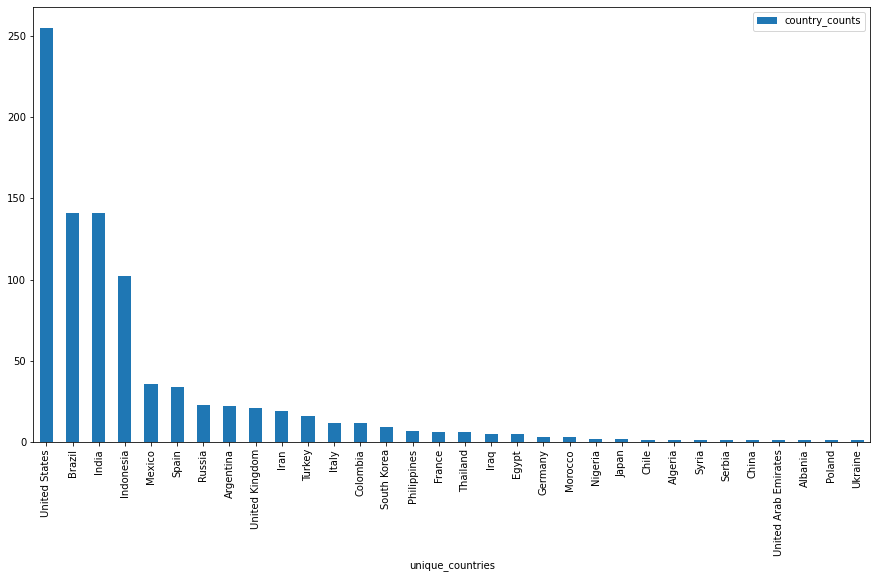

In [69]:
df_majority_country.plot.bar(x='unique_countries', y='country_counts', rot=90, figsize=(15,8))

In [70]:
df_instagram_category1 = df_instagram_imputed['category_1'].value_counts().rename_axis('unique_categories').reset_index(name='category_counts')
df_instagram_category1

,unique_categories,category_counts
0,Music,234
1,Cinema & Actors/actresses,214
2,Sports with a ball,113
3,Lifestyle,99
4,Shows,43
5,Modeling,36
6,Beauty,28
7,Humor & Fun & Happiness,18
8,Art/Artists,12
9,Family,11


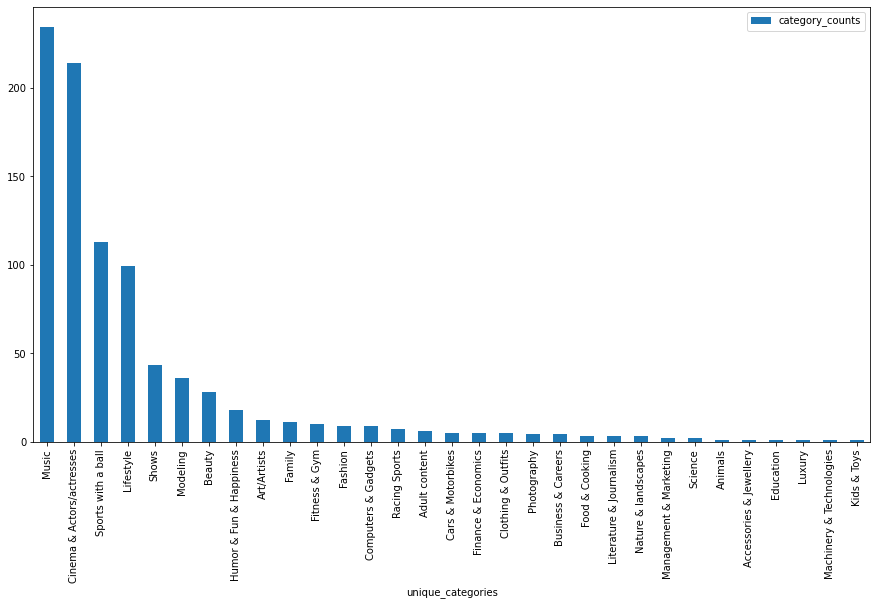

In [71]:
df_instagram_category1.plot.bar(x='unique_categories', y='category_counts', rot=90, figsize=(15,8))